In [101]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import tensorflow as tf


In [87]:
#  Import and read the Update_Listings_cleaned_v1.csv
import pandas as pd 
data = pd.read_csv("Update_Listings_cleaned_v1.csv")
data.head()

,unique_identifier,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
0,0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [88]:
# # Drop the non-beneficial columns and select target variable
X = data.drop(columns=['unique_identifier', 'listing_amount', 'lender_yield', 'borrower_apr', 'income_range_description',
                       'employment_status_description', 'occupation', 'borrower_state_num', 'borrower_state', 'borrower_city', 
                       'group_indicator', 'TUFicoRange', 'CoBorrowerApplication', 'rating_num', 'prosper_rating'])
y = data['rating_num']

In [89]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [90]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    random_state=3,
                                                   stratify=y)

In [91]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features_total, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 219 (876.00 Byte)
Trainable params: 219 (876.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5616
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5778
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.5899
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6162
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6242
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.6384
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.6606
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.6909
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.6970
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.7010
Epoch 11/

16/16 [==============================] - 0s 1ms/step - loss: -0.0899 - accuracy: 0.7859
Epoch 83/100
16/16 [==============================] - 0s 1ms/step - loss: -0.0989 - accuracy: 0.7859
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1102 - accuracy: 0.7859
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1205 - accuracy: 0.7879
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1285 - accuracy: 0.7859
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1405 - accuracy: 0.7818
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1508 - accuracy: 0.7838
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1615 - accuracy: 0.7859
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1724 - accuracy: 0.7879
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: -0.1819 - accuracy: 0.7879
Epo

In [94]:
# Use the trained model to make predictions
y_pred = nn.predict(X_test)

6/6 [==============================] - 0s 801us/step


In [98]:
# Since your model is performing binary classification and outputting probabilities,
# we need to convert these probabilities into binary labels before calculating accuracy.

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [100]:
accuracy = accuracy_score(y_pred_binary, y_test)
accuracy

0.7590361445783133

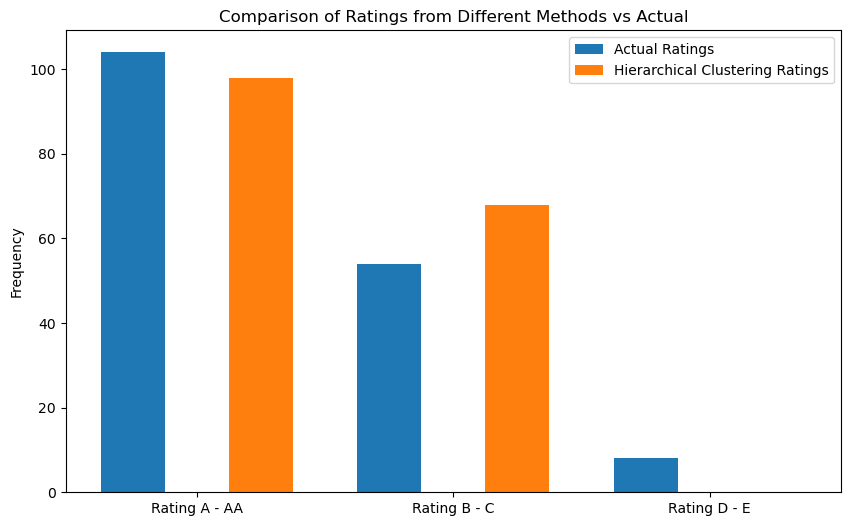

In [103]:
# Reshape y_pred_binary to a 1-dimensional array
y_pred_binary_flat = np.squeeze(y_pred_binary)

# Calculate counts of predicted labels
y_predict_counts = np.bincount(y_pred_binary_flat, minlength=3)

actual_counts = np.bincount(y_test, minlength=3)
# y_predict_counts = np.bincount(y_pred_binary, minlength=3)

# Create grouped bar chart
labels = ['Rating A - AA', 'Rating B - C', 'Rating D - E']
x = np.arange(len(labels))
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, actual_counts, width, label='Actual Ratings')
rects3 = ax.bar(x + width, y_predict_counts, width, label='Hierarchical Clustering Ratings')

# Add labels, title, and legend
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Ratings from Different Methods vs Actual')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
# Use a different visualization than shown above

# Optimizaiton
# The approach I took to optimize my model, is I added more layers, additional hidden nodes and changed the activation functions.